In [10]:
from __future__ import absolute_import, division, print_function, unicode_literals

import collections
import matplotlib.pyplot as plt
import numpy as np

import os
import shutil
#import pandas
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.metrics import mean_squared_error



import tensorflow as tf

from tensorflow.keras import layers
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)


In [2]:
#iniciar=True

In [11]:
##Leemos el fichero y obtenemos los caracteres diferentes
def cogerCaracteres(fichero, listaCaracteres=[]):
    with open(fichero,mode="r",encoding="utf8") as fichero:
        for linea in fichero:
            for c in linea:
                o=ord(c)
                if(o<256 and o!=13):
                    car={"caracter":c,"ord":o}
                    if(not car in listaCaracteres):
                        listaCaracteres.append(car)
    VOCABULARIO=len(listaCaracteres)
    return listaCaracteres

In [12]:
caracteres=[' ','\n']
#for c in listaCaracteres:
#    if(not c['caracter'] in caracteres):
#        caracteres.append(c['caracter'])
#
#print(caracteres)
caracteres=[' ', '\n', 'L', 'a', 'R', 'e', 'g', 'n', 't', 'p', 'o', 'r', 'l', 'd', 'A', 's', '«', 'C', 'í', '»', 'i', 'b', 'F', 'é', ',', 'M', '1', '9', '0', '.', 'P', 'ó', 'q', 'u', 'f', 'W', 'j', '_', 'm', 'h', 'v', 'á', 'c', 'y', ';', 'T', 'E', 'z', 'x', 'S', 'ñ', ':', 'ú', '(', ')', 'H', 'N', 'D', 'Y', 'k', 'Q', 'J', 'V', 'I', '¡', '!', 'O', 'G', 'B', '-', 'Á', '¿', "'", '?', 'U', 'É', 'ü', 'w', 'º', '2', '3', '4', 'Í', 'Z', 'ï', 'Ú', 'K', 'X', 'Ó', 'è', '8', '6', '7', 'ö', '+', '5', 'ç', '*', 'à', '/', '"', '%', '@', '$']
np.random.seed(7)


In [13]:
VOCABULARIO=len(caracteres)
print(VOCABULARIO)
LONGITUD=128
FICHERO_PESOS="modelos/pesosRNNTexto.hdf5"

104


In [14]:
def cargarEntrenamiento(fichero):
    #Indicamos un valor de semilla para el generador de números aleatorios

    textoAEntrenar=""
    with open(fichero,mode="r",encoding="utf8") as fichero:
        for linea in fichero:
            for c in linea:
                if(c in caracteres):
                    textoAEntrenar+=c
    
    entrenamiento=[]
    salida=[]
    lineas=textoAEntrenar.split("\n")
    for linea in lineas:
        #print(textoEntrada)
        linea="".ljust(LONGITUD," ")+linea+"\n"
        texto=[]
        for c in linea:
            texto.append(caracteres.index(c))
        for i in range(len(texto)-LONGITUD):
            entrenamiento.append(texto[i:i+LONGITUD])
            salida.append(texto[i+LONGITUD])
    
        
    #print(datos)
    #print(entrenamiento)
    #print(salida)
    entrenamiento = np.array(entrenamiento)
    #print(entrenamiento)
    #print(entrenamiento.shape)
    entrenamiento = np.reshape(entrenamiento, (entrenamiento.shape[0], entrenamiento.shape[1], 1))
    entrenamiento = entrenamiento/float(VOCABULARIO)
    salida = np.array(salida)
    salida = tf.keras.utils.to_categorical(salida,VOCABULARIO)
    #salida=np.reshape(salida,(salida.shape[0],VOCABULARIO-1))

    return entrenamiento,salida
    #dataset=dataset.values
    #dataset=dataset.astype('float32')

    ##normalizamos los datos. Normalizar es poner entre [0,1]
    #escaler = MinMaxScaler(feature_range=(0, 1))
    #datos = escaler.fit_transform(datos)
    #datos=np.array(datos)
    #datos=datos/float(10)
    #print(datos)

    ##Separamos los datos 
    #tamañoEntranamiento = int(len(dataset) * 0.67)
    #entrenamiento, test = dataset[0:tamañoEntranamiento,:], dataset[tamañoEntranamiento:len(dataset),:]
    #print(entrenamiento, test)
    #print(len(entrenamiento),len(test),len(dataset))

In [15]:
ficheros=os.scandir("textos")
print (ficheros)

In [16]:
entrenamiento=None
salida=None
#for i in range(73):
#    fichero="textos/texto 0-"+str(i)+".txt"
for fichero in ficheros:
    #caracteres=cogerCaracteres(fichero)
    entrenamientoP,salidaP =cargarEntrenamiento(fichero)
    
    if(entrenamiento is None):
        entrenamiento=entrenamientoP
    else:
        #for e in entrenamientoP:
        #    entrenamiento[0].append(e)
        entrenamiento=np.append(entrenamiento,entrenamientoP,axis=0)
    if(salida is None):
        salida=salidaP
    else:
        salida=np.append(salida,salidaP,axis=0)
    
print(entrenamiento.shape)
print(salida.shape)


(172277, 128, 1)
(172277, 104)


In [17]:
    
class salvar(tf.keras.callbacks.Callback):
  def on_train_batch_begin(self, batch, logs=None):
      return
  def on_train_batch_end(self, batch, logs=None):
      return
  def on_epoch_end(self, epoch, logs=None):
    if(os.path.isfile(FICHERO_PESOS)):
        if(os.path.isfile(FICHERO_PESOS+"_back")):
            os.remove(FICHERO_PESOS+"_back")
        shutil.copyfile(FICHERO_PESOS,FICHERO_PESOS+"_back")
  def on_test_batch_begin(self, batch, logs=None):
      return
  def on_test_batch_end(self, batch, logs=None):
      return


In [18]:
def construirModelo(vocabulario=VOCABULARIO, longitud=LONGITUD):
    model = tf.keras.Sequential()
    model.add(layers.LSTM(512, input_shape = (longitud, 1),  return_sequences = True ))
    model.add(layers.Dropout(0.2))
    model.add(layers.LSTM(512))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(vocabulario, activation = 'softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    
    return model



In [19]:
model = construirModelo(VOCABULARIO)
if(os.path.isfile(FICHERO_PESOS)):
    model.load_weights(FICHERO_PESOS)


checkpoint = tf.keras.callbacks.ModelCheckpoint(FICHERO_PESOS, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [salvar(),checkpoint]

history = model.fit(entrenamiento, salida, validation_split=0.05, epochs = 100, batch_size = 512, callbacks = callbacks_list, shuffle=True).history



Train on 163663 samples, validate on 8614 samples
Epoch 1/100
   512/163663 [..............................] - ETA: 21:00 - loss: 0.5609 - accuracy: 0.8184

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               66048     
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               3

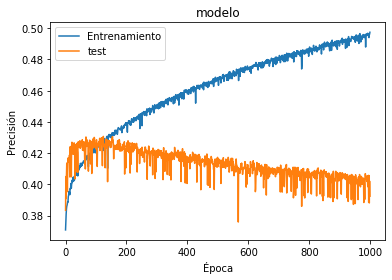

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sns
#from pylab import rcParams
#sns.set(style='whitegrid', palette='muted', font_scale=1.5)
#rcPatams['figure.figsize']=12, 5
print(model.summary())
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'test'],loc='upper left')

In [45]:
model = construirModelo(VOCABULARIO)
model.load_weights(FICHERO_PESOS)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')


In [48]:
#LONGITUD_SALIDA=100
import ipywidgets as widgets
#from IPython.display import clear_output
textoOriginal = []
prediccion = []
def submit(longitudSalida=200, aleatorio=True, limpiar=True):
    global textoOriginal
    global prediccion
    
    listaTextoCompleto = list(text.value)
    if(len(listaTextoCompleto)<LONGITUD):
        listaCaracteresSinProcesar = [' ' for i in range(LONGITUD-len(listaTextoCompleto))]+listaTextoCompleto[:len(listaTextoCompleto)]
    else:
        indice=len(listaTextoCompleto)-LONGITUD
        listaCaracteresSinProcesar = listaTextoCompleto[indice:indice+LONGITUD]
    
    textoProcesado = listaTextoCompleto[:len(textoOriginal)]    
    textoCompleto = text.value    
    #palabraSinProcesar.append(' ')
    
    textoAnterior = [caracteres.index(c) for c in textoProcesado]
    ultimoTexto = [caracteres.index(c) for c in listaCaracteresSinProcesar]
    
    #Alimentamos la red con toda la entrada anterior
    #TODO
    
    
    numero=[]
    salida=[]
    probabilidades=[]
    caracteresPosibles=[]
    rng = np.random.default_rng()
    iCaracter=0
    terminar=False
    while(iCaracter<longitudSalida and not terminar):
        iCaracter+=1
        #X=np.array([ultimoTexto])
        X = np.reshape(ultimoTexto, (1, LONGITUD,1))
        caracteresPosibles = model.predict((X/float(VOCABULARIO)))

        prediccionesOrdenadas=(caracteresPosibles.argsort()[0])[::-1]
        candidatos=[]
        for i,pred in enumerate(prediccionesOrdenadas):
            if((caracteresPosibles[0][prediccionesOrdenadas[0]]-caracteresPosibles[0][pred])<0.07):
                candidatos.append(pred)
        candidato=rng.integers(len(candidatos))
        #print(len(candidatos))
        siguienteCaracter=candidatos[(candidato if aleatorio else 0)]
        #probabilidades.append({"letra":caracteres[siguienteCaracter],"probabilidad":caracteresPosibles[0][siguienteCaracter]})
        probabilidades.append(caracteresPosibles[0][siguienteCaracter])
        ultimoTexto.append(siguienteCaracter)
        salida.append(siguienteCaracter)
        ultimoTexto = ultimoTexto[1:]
        numero.append(str(siguienteCaracter))
        if(siguienteCaracter==1):
            terminar=True
        
    #
    if limpiar:
        pronostico.clear_output()
    with pronostico:
        print( text.value+""+''.join(caracteres[c] for c in salida )+"")
        #print("#################")
        #print(probabilidades)
        #print("#################")
    
    #display(text)
    #text.focus_set()

In [50]:
pronostico=widgets.Output()

text = widgets.Text(continuous_update=True)
#La Regenta
text.value="Esto que digo de visitar talleres ajenos"
#text.value="placer"
#text.value="La lista de contagios,"
text.value=""
display(text,pronostico)
submit(200, True)
#pronostico.outputs.print("-----------------")
submit(200, False,False)
#text.on_submit(submit())
#text.observe(submit)


La calacidad de le huddo de la ropante de las estacientos de las de Casa a casta hasta hace consigeroras que se honviente en el prasencia de la película, se úonimo de los Seicotes.

En la entrevista, asemás de sa secalancia del hombre con el contenido del miedo del maracen de uno de los peísesos de las paracións de la historia de la mistoria del cantilo. Este modelo en controlado
